In [ ]:
import cv2
import numpy as np
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions

# Cargar el modelo preentrenado MobileNetV2
model = MobileNetV2(weights='imagenet')

def clasificar_imagen(imagen_path):
    # Leer la imagen usando OpenCV
    imagen = cv2.imread(imagen_path)
    imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
    imagen = cv2.resize(imagen, (224, 224))  # Redimensionar la imagen

    # Preprocesar la imagen
    imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
    imagen = cv2.resize(imagen, (224, 224))  # Redimensionar la imagen

    # Preprocesar la imagen
    imagen_array = np.array(imagen)
    imagen_array = np.expand_dims(imagen_array, axis=0)
    imagen_array = preprocess_input(imagen_array)

    # Realizar la predicción
    predicciones = model.predict(imagen_array)
    resultados = decode_predictions(predicciones, top=3)[0]

    return resultados

def main():
    imagen_path = 'gatos.jpg'  # Ruta de la imagen de perro
    resultados = clasificar_imagen(imagen_path)
    print("Predicciones:")
    for id, nombre, probabilidad in resultados:
        print(f"{nombre}: {probabilidad * 100:.2f}%")

if __name__ == "__main__":
    main()

35363/35363 [==============================] - 0s 1us/step
Predicciones:
Egyptian_cat: 41.25%
Siamese_cat: 7.29%
shovel: 3.58%


In [ ]:

####### Parameters #######

important_objects = "different kinds of bear" # If multiple add it like this: different kinds of bear, pepsi bottles, ... etc
number_of_prompts = 50 # between 50 to 100 is good
description_of_prompt = "bear in different environments" # A bit of description about the kind of images you need

####### Generated Prompt #######
print(f'''
Important Objects that must be present in each prompt:
{important_objects}

Input:
Generate {number_of_prompts} realistic prompts related to {description_of_prompt} for image generation.

Instructions:
Each prompt depicts real-life behavior.
Each prompt must contain all the important objects.
The important objects must be at different levels of distance (from very close to the camera to very far).

Output:
Return a Python list containing these prompts as strings for later use in training a computer vision model.
prompts = [prompt1, prompt2, ...]
''')


Important Objects that must be present in each prompt:
different kinds of bear

Input:
Generate 50 realistic prompts related to bear in different environments for image generation.

Instructions:
Each prompt depicts real-life behavior.
Each prompt must contain all the important objects.
The important objects must be at different levels of distance (from very close to the camera to very far).

Output:
Return a Python list containing these prompts as strings for later use in training a computer vision model.
prompts = [prompt1, prompt2, ...]



Utilizar el sigiente prompt, en chatgpt, para genera 50 prompts diferentes que ayuden a generar imagenes de perros golden:
Genera 50 prompts realistas relacionados con perros golden en diferentes ambientes para generacion de imagenes y ponlos en una lista de python
Generate 50 realistic prompts related to bear in different environments for image generation.
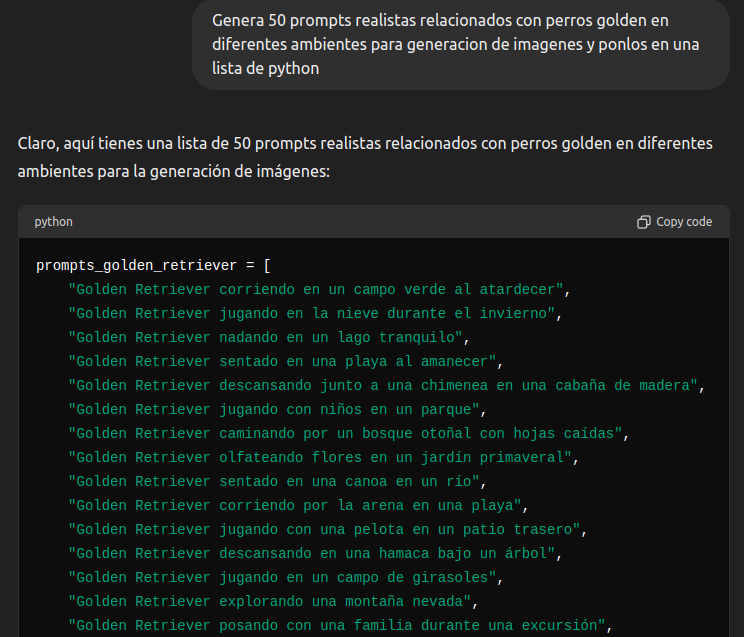

copio la lista y la pego

In [ ]:
prompts_golden_retriever = [
    "Golden Retriever corriendo en un campo verde al atardecer",
    "Golden Retriever jugando en la nieve durante el invierno",
    "Golden Retriever nadando en un lago tranquilo",
    "Golden Retriever sentado en una playa al amanecer",
    "Golden Retriever descansando junto a una chimenea en una cabaña de madera",
]
len(prompts_golden_retriever)

5

In [ ]:
prompts = prompts_golden_retriever


import random
random.shuffle(prompts)

In [ ]:
len(prompts)

5

In [ ]:
print(prompts[:4])

['Golden Retriever corriendo en un campo verde al atardecer', 'Golden Retriever nadando en un lago tranquilo', 'Golden Retriever jugando en la nieve durante el invierno', 'Golden Retriever descansando junto a una chimenea en una cabaña de madera']


Using Realistic Vision Image generation Model (you can use your own)

In [ ]:
%%capture
!pip install diffusers

from diffusers import DiffusionPipeline
pipeline = DiffusionPipeline.from_pretrained("SG161222/Realistic_Vision_V5.0_noVAE") # Loading the model

pipeline = pipeline.to("cuda")

In [ ]:
generated_images = pipeline(prompts).images

  0%|          | 0/50 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with an OutOfMemoryError: CUDA out of memory. Tried to allocate 2.51 GiB. GPU  (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:924.)
  return F.conv2d(input, weight, bias, self.stride,


In [ ]:

import os

output_directory = "generated_images"

for i, image in enumerate(generated_images):
    image.save(os.path.join(output_directory, f'image_{i + 1}.png'))

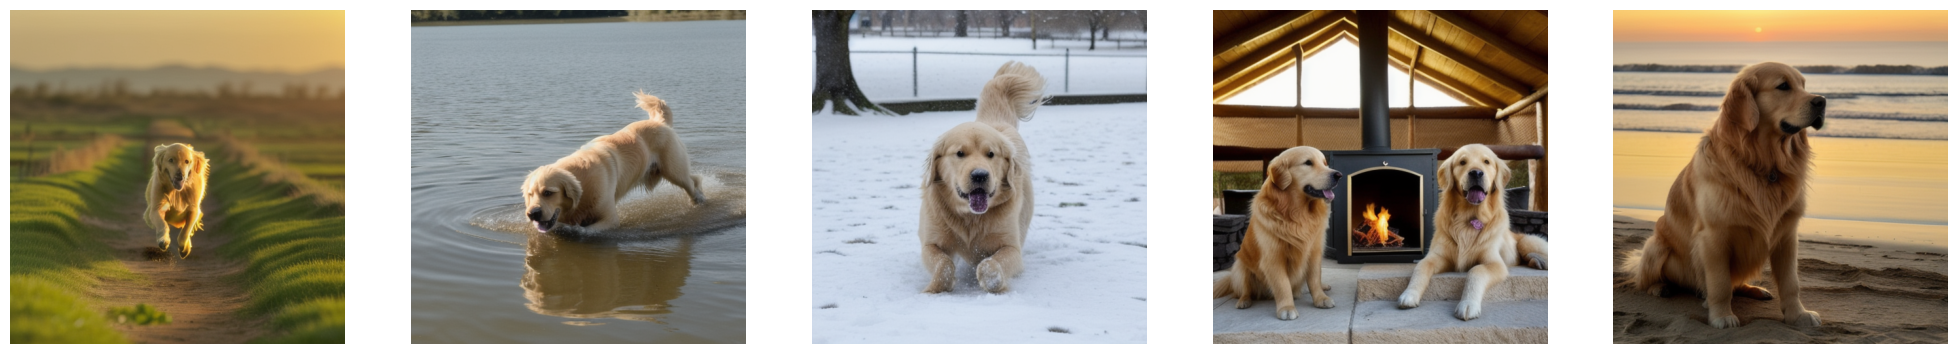

In [ ]:

import matplotlib.pyplot as plt


rows = 1
columns = len(generated_images)


fig, axes = plt.subplots(rows, columns, figsize=(columns * 5, rows * 5))


axes = axes.flatten()


for i, image in enumerate(generated_images):
    axes[i].imshow(image)
    axes[i].axis('off')


plt.show()

In [ ]:
%%capture
!pip install -q \
autodistill \
autodistill-grounded-sam \
autodistill-yolov8 \
roboflow \
supervision==0.9.0

In [ ]:

from autodistill.detection import CaptionOntology

ontology=CaptionOntology({
    "animal face": "animal face",
})

In [ ]:
import shutil

shutil.rmtree('output_folder', ignore_errors=True)

In [ ]:

from autodistill_grounded_sam import GroundedSAM

base_model = GroundedSAM(ontology=ontology)
dataset = base_model.label(
    input_folder='generated_images',
    extension=".png",
    output_folder='output_folder')

trying to load grounding dino directly
downloading dino model weights


torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3587.)


final text_encoder_type: bert-base-uncased


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

`resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Labeling generated_images/image_3.png:   0%|          | 0/5 [00:00<?, ?it/s]The `device` argument is deprecated and will be removed in v5 of Transformers.
torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
None of the inputs have requires_grad=True. Gradients will be None
Labeling generated_images/image_1.png: 100%|██████████| 5/5 [00:15<00:00,  3.09s/it]

Labeled dataset created - ready for distillation.


In [ ]:
ANNOTATIONS_DIRECTORY_PATH = f"output_folder/train/labels"
IMAGES_DIRECTORY_PATH = f"output_folder/train/images"
DATA_YAML_PATH = f"output_folder/data.yaml"

SAMPLE_SIZE = 16
SAMPLE_GRID_SIZE = (4, 4)
SAMPLE_PLOT_SIZE = (10,10)

In [ ]:
import supervision as sv

dataset = sv.DetectionDataset.from_yolo(
    images_directory_path=IMAGES_DIRECTORY_PATH,
    annotations_directory_path=ANNOTATIONS_DIRECTORY_PATH,
    data_yaml_path=DATA_YAML_PATH)

len(dataset)

4

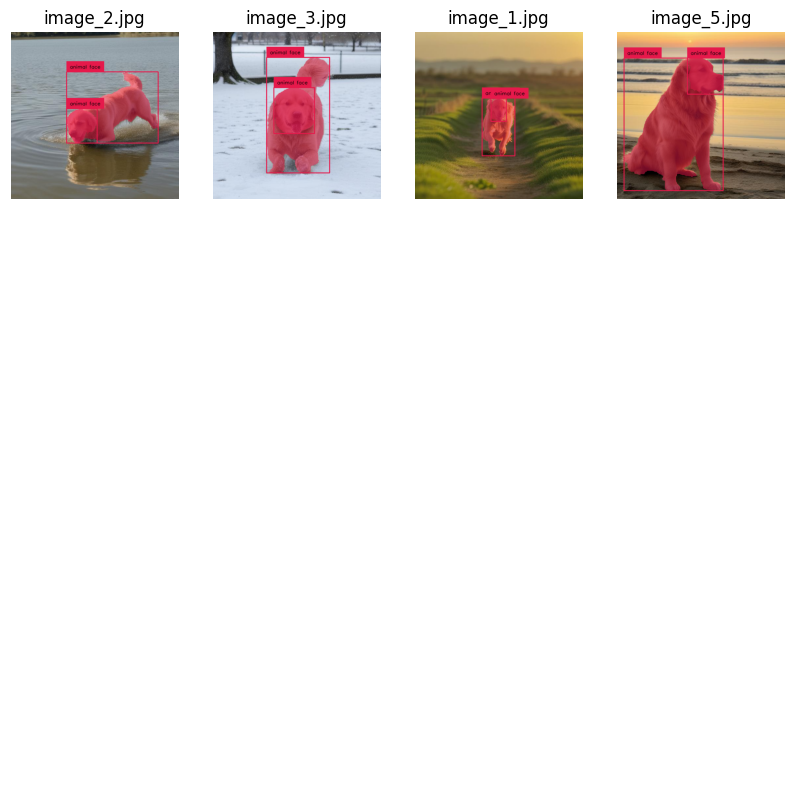

In [ ]:

import supervision as sv

image_names = list(dataset.images.keys())[:5]

mask_annotator = sv.MaskAnnotator()
box_annotator = sv.BoxAnnotator()

images = []
for image_name in image_names:
    image = dataset.images[image_name]
    annotations = dataset.annotations[image_name]
    labels = [
        dataset.classes[class_id]
        for class_id
        in annotations.class_id]
    annotates_image = mask_annotator.annotate(
        scene=image.copy(),
        detections=annotations)
    annotates_image = box_annotator.annotate(
        scene=annotates_image,
        detections=annotations,
        labels=labels)
    images.append(annotates_image)

sv.plot_images_grid(
    images=images,
    titles=image_names,
    grid_size=SAMPLE_GRID_SIZE,
    size=SAMPLE_PLOT_SIZE)

https://github.com/FareedKhan-dev/create-high-quality-dataset-for-computer-vision/tree/main

#Aqui hay algo de homografia en opencv

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

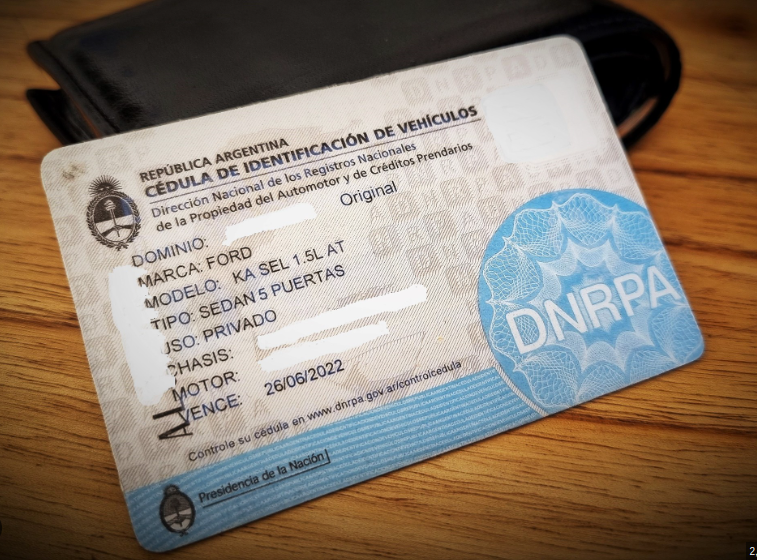

In [ ]:
img = cv2.imread('documentogirado.png', cv2.IMREAD_COLOR)
cv2_imshow(img)

In [ ]:
# Resize image to workable size
dim_limit = 1080
max_dim = max(img.shape)
if max_dim > dim_limit:
    resize_scale = dim_limit / max_dim
    img = cv2.resize(img, None, fx=resize_scale, fy=resize_scale)

# Making Copy of original image.
orig_img = img.copy()

In [ ]:
# Repeated Closing operation to remove text from the document.
kernel = np.ones((5,5),np.uint8)
img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel, iterations= 3)

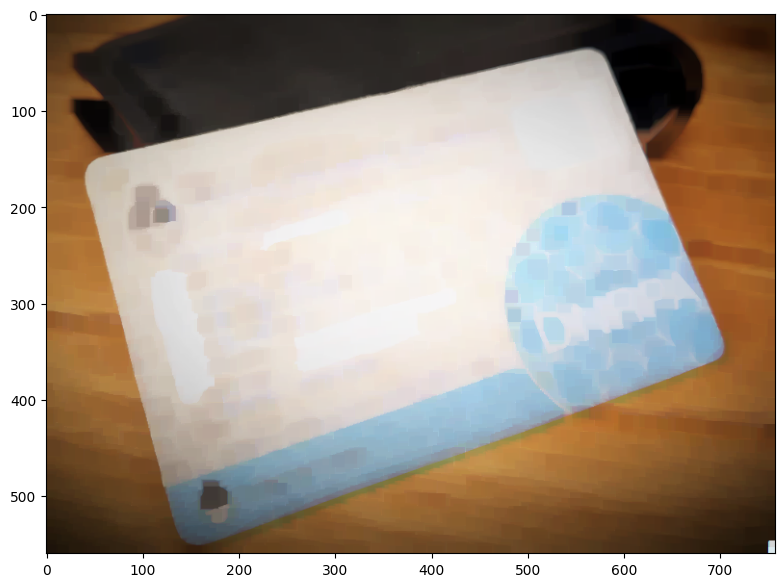

In [ ]:
plt.figure(figsize = (10,7))
plt.imshow(img[:,:,::-1])
plt.show()

In [ ]:
mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (20,20,img.shape[1]-20,img.shape[0]-20)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]

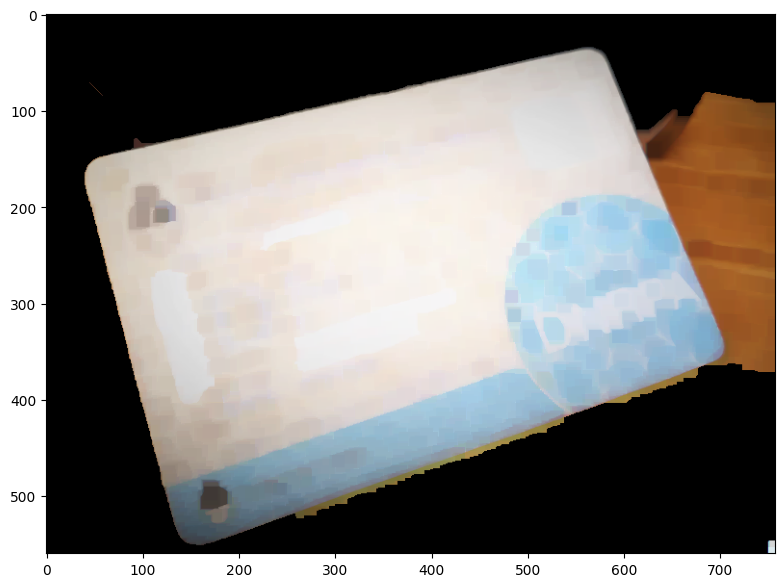

In [ ]:
plt.figure(figsize = (10,7))
plt.imshow(img[:,:,::-1])
plt.show()

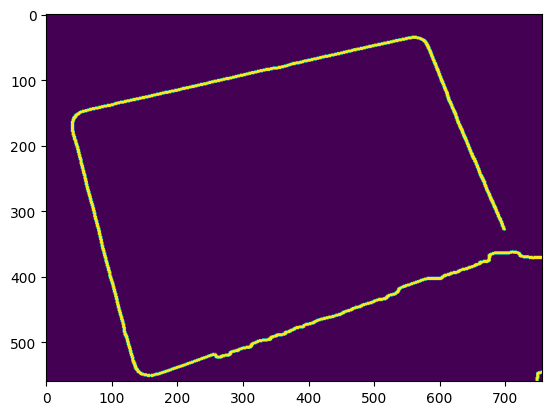

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (11, 11), 0)
# Edge Detection.
canny = cv2.Canny(gray, 100, 200)
canny = cv2.dilate(canny, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)))
plt.imshow(canny)

In [ ]:
# Blank canvas.
con = np.zeros_like(img)
# Finding contours for the detected edges.
contours, hierarchy = cv2.findContours(canny, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
# Keeping only the largest detected contour.
page = sorted(contours, key=cv2.contourArea, reverse=True)[:5]
con = cv2.drawContours(con, page, -1, (0, 255, 255), 3)

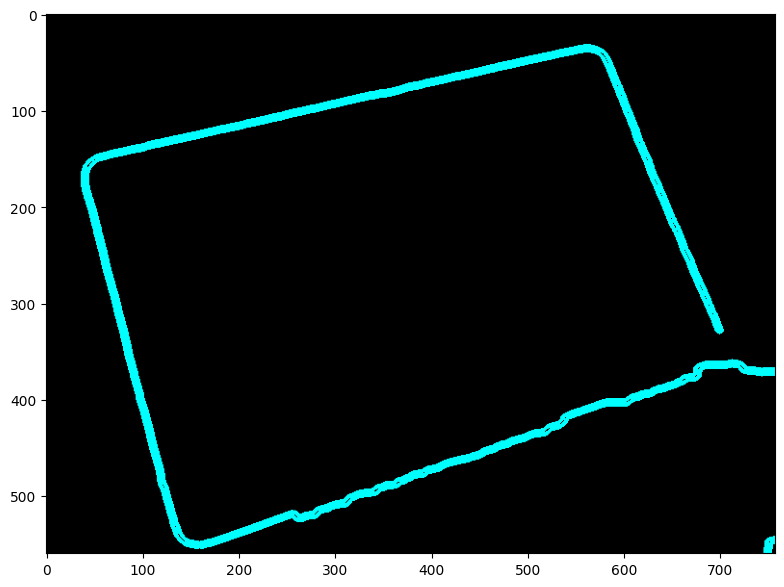

In [ ]:
plt.figure(figsize = (10,7))
plt.imshow(con)
plt.show()

In [ ]:
def order_points(pts):
	'''Rearrange coordinates to order:
       top-left, top-right, bottom-right, bottom-left'''
	rect = np.zeros((4, 2), dtype='float32')
	pts = np.array(pts)
	s = pts.sum(axis=1)
	# Top-left point will have the smallest sum.
	rect[0] = pts[np.argmin(s)]
    # Bottom-right point will have the largest sum.
	rect[2] = pts[np.argmax(s)]

	diff = np.diff(pts, axis=1)
    # Top-right point will have the smallest difference.
	rect[1] = pts[np.argmin(diff)]
    # Bottom-left will have the largest difference.
	rect[3] = pts[np.argmax(diff)]
	# Return the ordered coordinates.
	return rect.astype('int').tolist()

[[748, 547], [756, 544], [751, 559], [747, 559]]


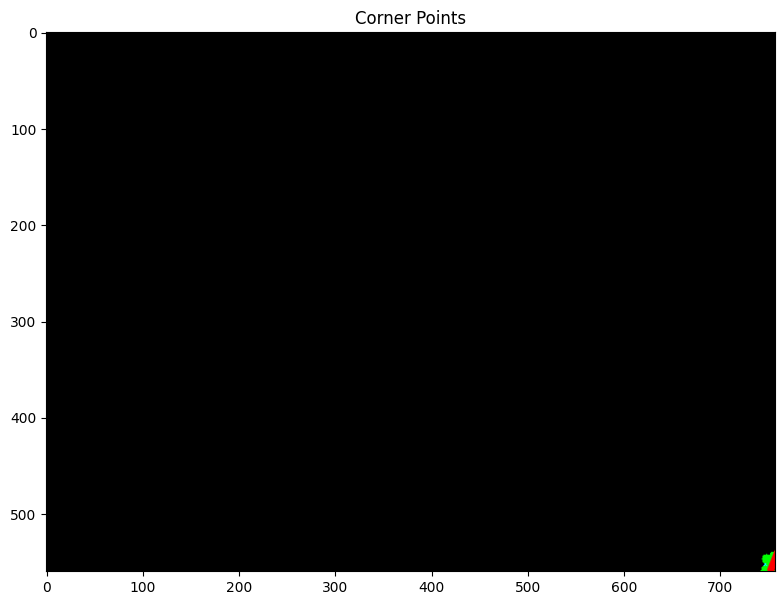

In [ ]:
# Blank canvas.
con = np.zeros_like(img)
# Loop over the contours.
for c in page:
	# Approximate the contour.
	epsilon = 0.02 * cv2.arcLength(c, True)
	corners = cv2.approxPolyDP(c, epsilon, True)
	# If our approximated contour has four points
	if len(corners) == 4:
		break
cv2.drawContours(con, c, -1, (0, 255, 255), 3)
cv2.drawContours(con, corners, -1, (0, 255, 0), 10)
# Sorting the corners and converting them to desired shape.
corners = sorted(np.concatenate(corners).tolist())

# Displaying the corners.
for index, c in enumerate(corners):
    character = chr(65 + index)
    cv2.putText(con, character, tuple(c), cv2.FONT_HERSHEY_SIMPLEX, 5, (255, 0, 0), 5, cv2.LINE_AA)

# Rearranging the order of the corner points.
corners = order_points(corners)

print(corners)

plt.figure(figsize = (10,7))
plt.imshow(con)
plt.title('Corner Points')
plt.show()

In [ ]:
(tl, tr, br, bl) = corners
# Finding the maximum width.
widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
maxWidth = max(int(widthA), int(widthB))

# Finding the maximum height.
heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
maxHeight = max(int(heightA), int(heightB))
# Final destination co-ordinates.
destination_corners = [
		[0, 0],
		[maxWidth, 0],
		[maxWidth, maxHeight],
		[0, maxHeight]]
print(destination_corners)

[[0, 0], [8, 0], [8, 15], [0, 15]]


In [ ]:

# Getting the homography.
homography = cv2.getPerspectiveTransform(np.float32(corners), np.float32(destination_corners))
# Perspective transform using homography.
final = cv2.warpPerspective(orig_img, np.float32(homography), (maxWidth, maxHeight), flags=cv2.INTER_LINEAR)
# cv2.imwrite('grabcutop/img22.jpg', final)

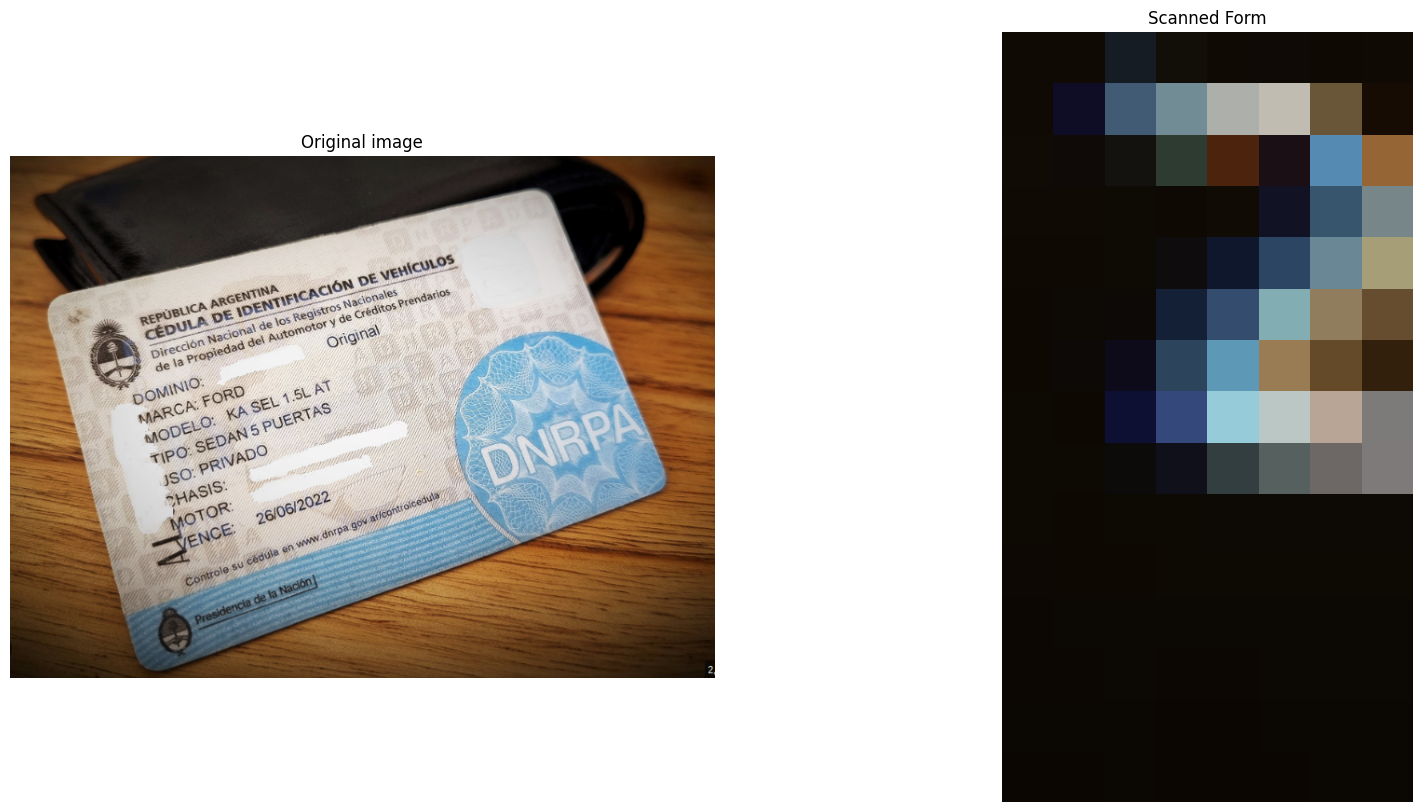

In [ ]:
# Display results
plt.figure(figsize=[20,10]);
plt.subplot(121); plt.imshow(orig_img[:,:,::-1]); plt.axis('off'); plt.title("Original image")
plt.subplot(122); plt.imshow(final[:,:,::-1]); plt.axis('off'); plt.title("Scanned Form");

In [1]:
#https://omes-va.com/reconocimiento-de-matriculas-vehiculares-opencv-pytesseract-ocr-python/
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (3,359 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [3]:
pytesseract.pytesseract.tesseract_cmd = r'/usr/local/bin/pytesseract'

NameError: name 'pytesseract' is not defined

area= 63156.0
PLACA:  AAA-123



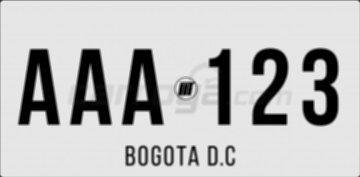

area= 72456.5
PLACA:  AAA-123



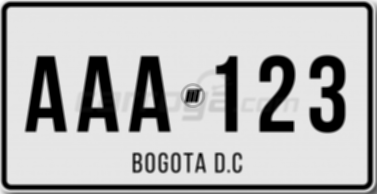

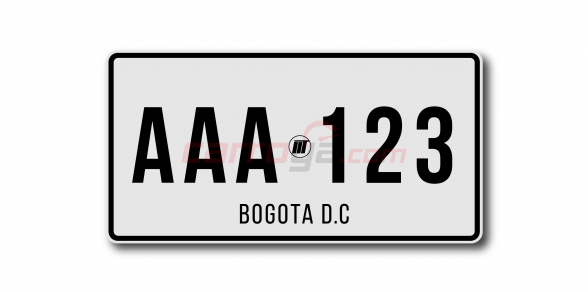

In [5]:
import cv2
import pytesseract
from google.colab.patches import cv2_imshow

#leer la imagen y transformarla a binaria
placa = []
image = cv2.imread('/content/placa2.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#disminuir ruido
gray = cv2.blur(gray,(3,3))
#detectar bordes
canny = cv2.Canny(gray,150,200)
canny = cv2.dilate(canny,None,iterations=1)
#_,cnts,_ = cv2.findContours(canny,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
cnts,_ = cv2.findContours(canny,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
#cv2.drawContours(image,cnts,-1,(0,255,0),2)
for c in cnts:
  area = cv2.contourArea(c)
  x,y,w,h = cv2.boundingRect(c)
  epsilon = 0.09*cv2.arcLength(c,True)
  approx = cv2.approxPolyDP(c,epsilon,True)

  if len(approx)==4 and area>9000:
    print('area=',area)
    #cv2.drawContours(image,[approx],0,(0,255,0),3)
    aspect_ratio = float(w)/h
    if aspect_ratio>1:
      placa = gray[y:y+h,x:x+w]
      text = pytesseract.image_to_string(placa,config='--psm 11')
      print('PLACA: ',text)
      cv2_imshow(placa)


cv2_imshow(image)

In [8]:
from PIL import Image
import pytesseract

im = Image.open("texto.png")

text = pytesseract.image_to_string(im, lang = 'eng')

print(text)


The (quick) [brown] {fox} jumps!
Over the $43,456.78 <lazy> #90 dog
& duck/goose, as 12.5% of E-mail
from aspammer@website.com is spam.
Der ,.schnelle” braune Fuchs springt
iiber den faulen Hund. Le renard brun
«rapide» saute par-dessus le chien
paresseux. La volpe marrone rapida
salta sopra il cane pigro. El zorro
marron rapido salta sobre el perro
perezoso. A raposa marrom rapida
salta sobre o céo preguicoso.



In [9]:
from mrz_reader import mrz_reader

ModuleNotFoundError: No module named 'mrz_reader'